In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [3]:
# Define paths
data_dir_train = "C:/Users/MSI/Downloads/archive/YELLOW-RUST-19"
data_dir_test = "C:/Users/MSI/Downloads/archive/RAW"

In [74]:
# Define parameters
img_size = (20, 180)
batch_size = 128

In [79]:
def plot_sample_images(train_path, num_images=6):
    """
    Displays a specified number of random images from the training folder along with their category titles.

    Args:
        train_path (str): Path to the training directory containing category subfolders.
        num_images (int): Number of images to display (default is 6).
    """
    # Get a list of category folders
    categories = os.listdir(train_path)

    # Select random images
    random_images = []
    for _ in range(num_images):
        category = random.choice(categories)  # Pick a random category
        image_name = random.choice(os.listdir(os.path.join(train_path, category)))  # Pick a random image
        image_path = os.path.join(train_path, category, image_name)
        random_images.append((image_path, category))  # Store image path and category name

    # Display images one by one
    for image_path, category in random_images:
        # Read the image using OpenCV
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color representation

        # Show the image with its category title
        plt.imshow(img)
        plt.title(category, fontsize=12, fontweight="bold")  # Add title (category name)
        plt.axis("off")
        plt.show()  # Display the image in its original size


In [80]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir_train, target_size=(256, 256), batch_size=batch_size, 
    class_mode='categorical', subset='training', keep_aspect_ratio=True)

val_generator = datagen.flow_from_directory(
    data_dir_train, target_size=(256, 256), batch_size=batch_size, 
    class_mode='categorical', subset='validation', keep_aspect_ratio=True)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    data_dir_test, target_size=(256, 256), batch_size=batch_size, 
    class_mode='categorical', shuffle=False, keep_aspect_ratio=True)

Found 12000 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 5421 images belonging to 6 classes.


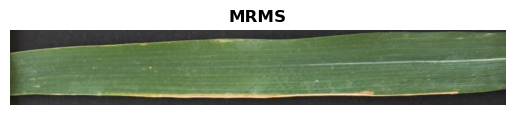

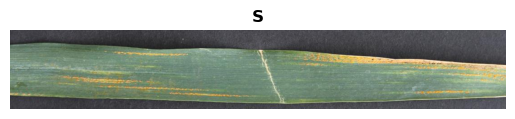

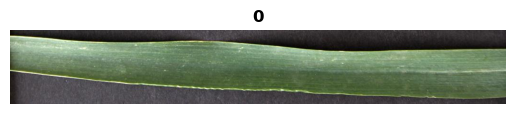

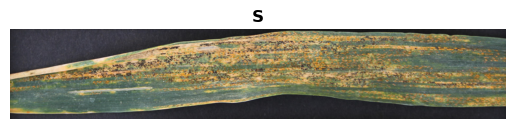

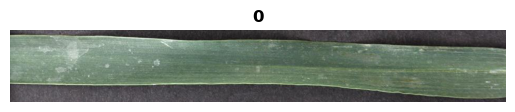

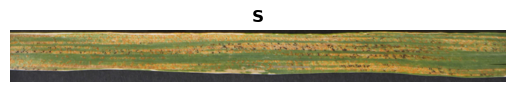

In [81]:
# Visualize training samples 
train_path = "C:/Users/MSI/Downloads/archive/YELLOW-RUST-19"
plot_sample_images(train_path, num_images=6)

In [89]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Build CNN model correctly
model = Sequential([
    Input(shape=(256, 256, 3)),  # Change input size if dataset has 256x256 images
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,750 (56.61 MB)

 Trainable params: 14,839,750 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
# Train the model for 20 epochs
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 335s 4s/step - accuracy: 0.2841 - loss: 1.5954 - val_accuracy: 0.4467 - val_loss: 1.2998
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.4100 - loss: 1.3140 - val_accuracy: 0.4533 - val_loss: 1.2373
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.4724 - loss: 1.2303 - val_accuracy: 0.4760 - val_loss: 1.2048
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.5197 - loss: 1.1438 - val_accuracy: 0.4800 - val_loss: 1.2157
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.5473 - loss: 1.0667 - val_accuracy: 0.4923 - val_loss: 1.1522
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.5878 - loss: 0.9823 - val_accuracy: 0.4987 - val_loss: 1.1606
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.6278 - loss: 0.9026 - val_accuracy: 0.5110 - val_loss: 1.1767
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 292s 3s/step - accuracy: 0.6693 - loss: 0.8216 - val_accuracy: 0.5353 - v

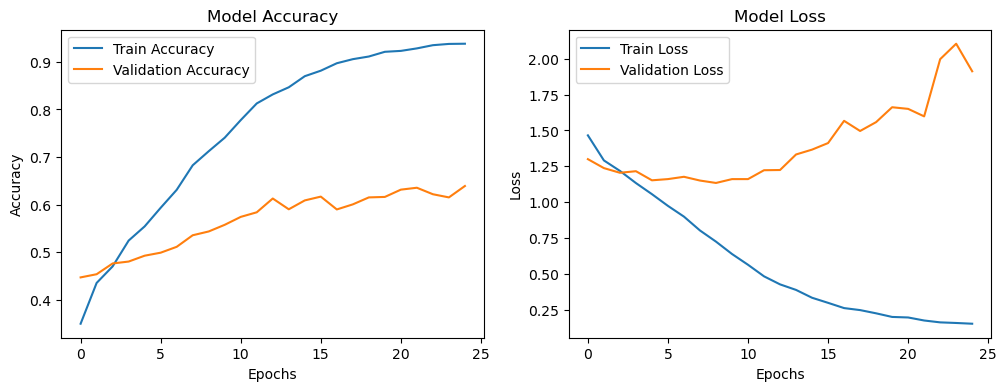

In [94]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

plot_training_history(history)

In [95]:
# Evaluate on test set
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

43/43 ━━━━━━━━━━━━━━━━━━━━ 36s 823ms/step


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_test_predictions(generator, model, num_images=18, min_classes=6):
    """
    Displays test images with their true labels and model predictions.
    Ensures images come from at least `min_classes` different categories.

    Args:
        generator: The test data generator.
        model: The trained model.
        num_images (int): Total number of images to display (default: 18).
        min_classes (int): Minimum number of different classes (default: 6).

    Returns:
        None
    """
    class_names = list(generator.class_indices.keys())

    # Store images and labels ensuring class diversity
    collected_images, collected_labels = [], []
    class_samples = {cls: [] for cls in range(len(class_names))}  # Dictionary to store samples per class
    
    # Iterate through generator batches to collect diverse samples
    for _ in range(15):  # Check multiple batches
        batch_images, batch_labels = next(generator)
        batch_label_indices = np.argmax(batch_labels, axis=1)

        for img, lbl, lbl_idx in zip(batch_images, batch_labels, batch_label_indices):
            if len(class_samples[lbl_idx]) < num_images // min_classes:
                class_samples[lbl_idx].append((img, lbl, lbl_idx))

        # Stop if we have enough unique classes
        if sum(len(v) > 0 for v in class_samples.values()) >= min_classes:
            break

    # Select classes ensuring diversity
    collected_classes = [k for k, v in class_samples.items() if len(v) > 0]
    selected_classes = random.sample(collected_classes, min(min_classes, len(collected_classes)))

    for cls in selected_classes:
        collected_images.extend([x[0] for x in class_samples[cls]])
        collected_labels.extend([x[1] for x in class_samples[cls]])

    # Trim to num_images if extra images are collected
    collected_images = np.array(collected_images[:num_images])
    collected_labels = np.array(collected_labels[:num_images])

    # Ensure images are properly scaled
    if collected_images.max() <= 1:
        collected_images = (collected_images * 255).astype("uint8")

    # Get model predictions
    y_pred_batch = model.predict(collected_images)
    
    # Plot images with predictions
    plt.figure(figsize=(15, 10))
    for i in range(len(collected_images)):
        plt.subplot(3, 6, i + 1)  # Arrange in a 3x6 grid
        plt.imshow(collected_images[i])
        true_label = class_names[np.argmax(collected_labels[i])]
        pred_label = class_names[np.argmax(y_pred_batch[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
        plt.axis("off")

    plt.suptitle("Test Sample Predictions (Ensuring Class Diversity)", fontsize=16)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


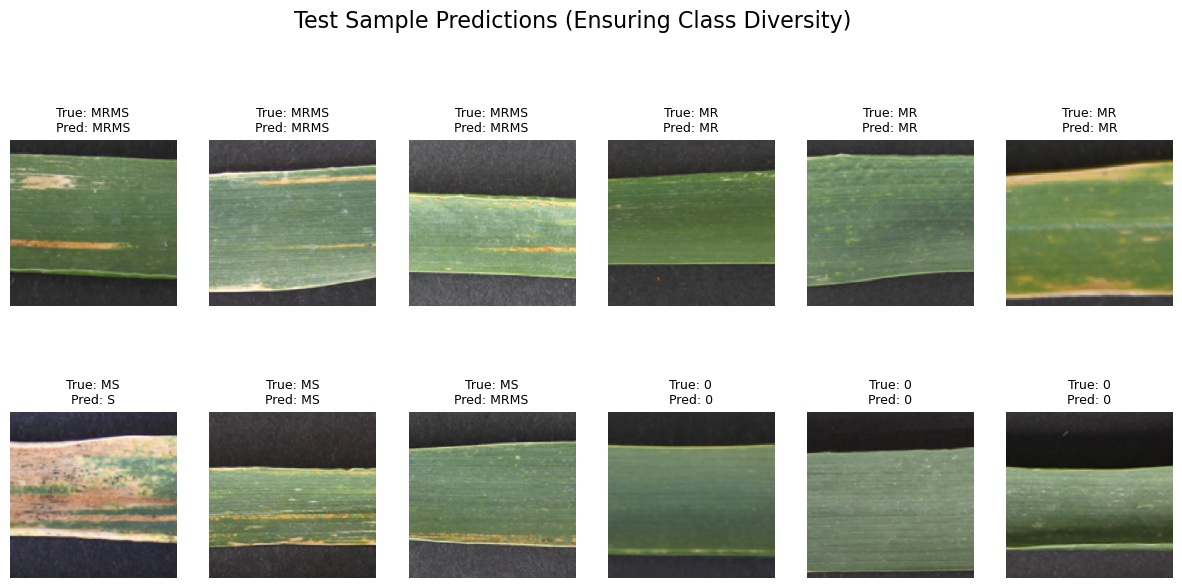

In [111]:
# Call function to visualize predictions
plot_test_predictions(test_generator, model)

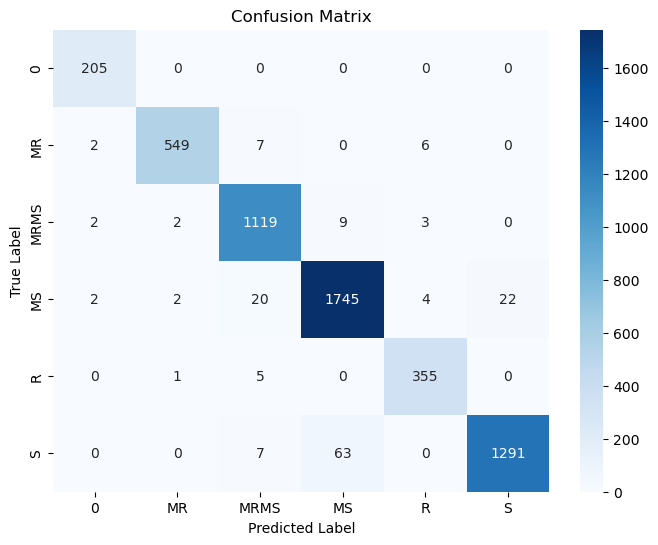

In [112]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [113]:
accuracy = np.sum(y_true == y_pred) / len(y_true)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.10%


In [118]:
model.save("yellow_rust_cnn.keras")  # Save in the current directory
model.save(r"C:\Users\MSI\Downloads\archive\yellow_rust_cnn.keras")  # Save in a specific path

Model expects: (None, 256, 256, 3), Provided: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


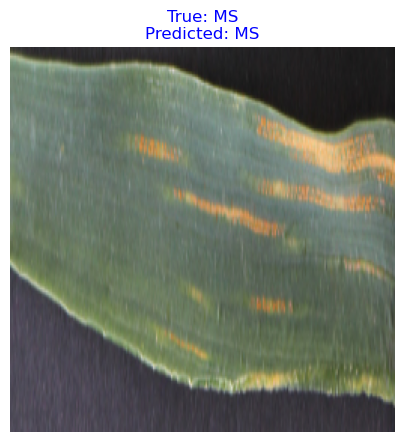

True Label: MS, Predicted Label: MS


In [138]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_single_prediction(image_path, model, class_names, target_size=(256, 256)):
    """
    Predicts and displays a single image with its true label and model-predicted label.

    Args:
        image_path (str): Path to the image file.
        model: Trained classification model.
        class_names (list): List of class labels.
        target_size (tuple): Expected input size for the model (default: (256, 256)).

    Returns:
        tuple: (true_class, predicted_class)
    """
    # Extract true class from the folder name (assuming dataset structure is "dataset/class_name/image.jpg")
    true_class = os.path.basename(os.path.dirname(image_path))  # Gets folder name as the class label

    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to model's expected input size
    img_normalized = img / 255.0  # Normalize to [0,1] range
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

    # Debugging: Check input shape
    print(f"Model expects: {model.input_shape}, Provided: {img_expanded.shape}")

    # Get prediction
    prediction = model.predict(img_expanded)
    predicted_class = class_names[np.argmax(prediction)]

    # Display the image with true and predicted labels
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"True: {true_class}\nPredicted: {predicted_class}", fontsize=12, color='blue')
    plt.axis("off")
    plt.show()

    return true_class, predicted_class

# Example usage:
# Assuming `model` is your trained model and `train_generator.class_indices.keys()` provides class names
class_names = list(train_generator.class_indices.keys())  
image_path = "C:/Users/MSI/Downloads/archive/YELLOW-RUST-19/MS/4_MS_924.jpg"

true_label, predicted_label = plot_single_prediction(image_path, model, class_names)
print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

Model expects: (None, 256, 256, 3), Provided: (1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


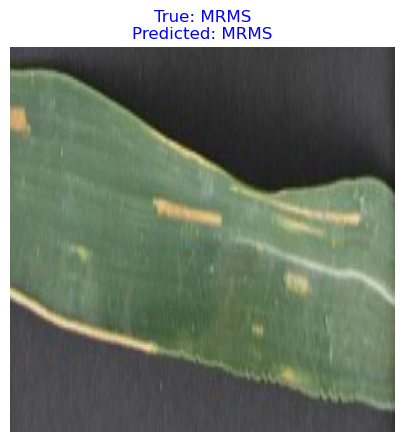

True Label: MRMS, Predicted Label: MRMS


In [140]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_single_prediction(image_path, model, class_names, target_size=(256, 256)):
    """
    Predicts and displays a single image with its true label and model-predicted label.

    Args:
        image_path (str): Path to the image file.
        model: Trained classification model.
        class_names (list): List of class labels.
        target_size (tuple): Expected input size for the model (default: (256, 256)).

    Returns:
        tuple: (true_class, predicted_class)
    """
    # Extract true class from the folder name (assuming dataset structure is "dataset/class_name/image.jpg")
    true_class = os.path.basename(os.path.dirname(image_path))  # Gets folder name as the class label

    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)  # Resize to model's expected input size
    img_normalized = img / 255.0  # Normalize to [0,1] range
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

    # Debugging: Check input shape
    print(f"Model expects: {model.input_shape}, Provided: {img_expanded.shape}")

    # Get prediction
    prediction = model.predict(img_expanded)
    predicted_class = class_names[np.argmax(prediction)]

    # Display the image with true and predicted labels
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f"True: {true_class}\nPredicted: {predicted_class}", fontsize=12, color='blue')
    plt.axis("off")
    plt.show()

    return true_class, predicted_class

# Example usage:
# Assuming `model` is your trained model and `train_generator.class_indices.keys()` provides class names
class_names = list(train_generator.class_indices.keys())  
image_path = r"C:\Users\MSI\Downloads\archive\YELLOW-RUST-19\MRMS\3_MRMS_977.jpg"

true_label, predicted_label = plot_single_prediction(image_path, model, class_names)
print(f"True Label: {true_label}, Predicted Label: {predicted_label}")